#### Elementos finitos linear 1D

## Montar a matrix de massa

In [82]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]

stiff_matrix (generic function with 1 method)

In [83]:
Nel = 100
a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];
idx = 2:Ndof-1

2:100

In [84]:

dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x100 Array{Int64,2}:
 1  2  3  4  5  6  7  8   9  10  11  12  …  93  94  95  96  97  98   99  100
 2  3  4  5  6  7  8  9  10  11  12  13     94  95  96  97  98  99  100  101

In [85]:

#diags
dl = zeros(Ndof-1)
dp = zeros(Ndof)

##
for e = 1:Nel
    dMe = stiff_matrix(xn[e], xn[e+1])
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            if kg == ig #principal
                dp[kg] += -dMe[k,i] + Me[k,i]
            end
            if kg == ig + 1 && kg > 1#low
                dl[kg-1] += -dMe[k,i] + Me[k,i]
            end
        end
    end
end

Tri_dM = SymTridiagonal(dp[2:end-1],dl[2:end-1]) 

99x99 SymTridiagonal{Float64}:
 -99.9867   50.0033    0.0       0.0     …    0.0       0.0       0.0   
  50.0033  -99.9867   50.0033    0.0          0.0       0.0       0.0   
   0.0      50.0033  -99.9867   50.0033       0.0       0.0       0.0   
   0.0       0.0      50.0033  -99.9867       0.0       0.0       0.0   
   0.0       0.0       0.0      50.0033       0.0       0.0       0.0   
   0.0       0.0       0.0       0.0     …    0.0       0.0       0.0   
   0.0       0.0       0.0       0.0          0.0       0.0       0.0   
   0.0       0.0       0.0       0.0          0.0       0.0       0.0   
   0.0       0.0       0.0       0.0          0.0       0.0       0.0   
   0.0       0.0       0.0       0.0          0.0       0.0       0.0   
   0.0       0.0       0.0       0.0     …    0.0       0.0       0.0   
   0.0       0.0       0.0       0.0          0.0       0.0       0.0   
   0.0       0.0       0.0       0.0          0.0       0.0       0.0   
   ⋮                

## Montar o lado direito da equação:

In [86]:
#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 0,y'(1)=0
fun(x) = (1.0 - 4*pi^2)*sin(2*pi*x) 
resp(x) = sin(2*pi*x)
    

resp (generic function with 1 method)

In [87]:
fe = fun(xn);

In [88]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        
F = F[idx];


## Solução do problema

In [89]:
u = Tri_dM\F ;

In [90]:
u = [0.0; u; 0.0];

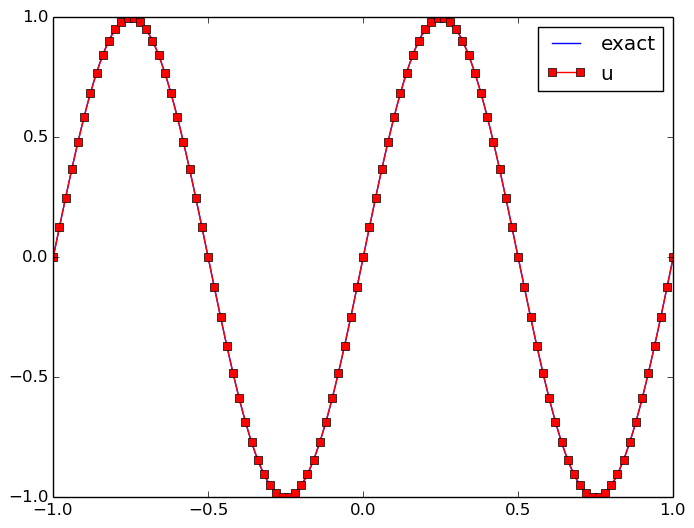

PyObject <matplotlib.legend.Legend object at 0x7f317f6a1890>

In [91]:
using PyPlot
xx = linspace(a, b, 201)
plot(xx, resp(xx),label="exact")
plot(xn, u, "rs-",label = "u")
legend()


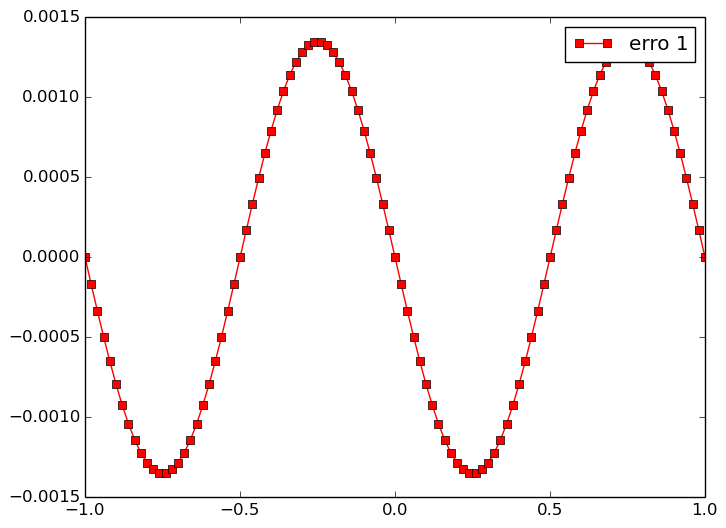

0.001346372061097334

In [92]:
e1 = u - resp(xn)
figure()
plot(xn, e1, "rs-",label="erro 1")
legend()
maxabs(e1)